In [10]:
from datasets import load_dataset
import pandas as pd

In [11]:
dataset = load_dataset("imdb")


In [12]:
dataset.keys()

dict_keys(['train', 'test', 'unsupervised'])

### Same size for the train and test 

In [13]:
sample_size = 500

train_sample = dataset['train'].shuffle(seed=42).select(range(sample_size))

test_sample = dataset['test'].shuffle(seed=42).select(range(sample_size))

### Convert the data into Dataframe

In [14]:
df = pd.DataFrame(train_sample)
df_s = pd.DataFrame(test_sample)
df.rename(columns = {'text': 'review', 'label': 'sentiment'}, inplace = True)
df.head()

,review,sentiment
0,There is no relation at all between Fortier an...,1
1,This movie is a great. The plot is very true t...,1
2,"George P. Cosmatos' ""Rambo: First Blood Part I...",0
3,In the process of trying to establish the audi...,1
4,"Yeh, I know -- you're quivering with excitemen...",0


In [15]:
print(df.iloc[120]['review'])

Having been forced by my children to watch this at least 10 times for each of the last 2 Christmases, I feel adequately qualified to pass judgment on this version of Dr. Seuss' classic tale, and well... it's not very good. First off, following a classic act like Chuck Jones' animated TV special is going to be difficult for anyone, but this interpretation is so heavy-handed and padded as to be positively numbing. I will concede that there are a handful of inspired gags, but overall the film comes off as a calculated cash grab, at the same time as it is supposedly decrying the commercialisation of Christmas. Jim Carrey is typically over the top here, but that is completely at odds with the character of the Grinch. As characterised by Boris Karloff, he was a slow burn; methodical and sly. There is no method to Carrey's madness, and that is only the most obvious error made. Talented actors like Jeffrey Tambor and Christine Baranski are utterly wasted here. Why, Universal, why? I mean , I u

In [16]:
df.iloc[120]['sentiment']

np.int64(0)

In [17]:
df['sentiment'].value_counts()

sentiment
0    254
1    246
Name: count, dtype: int64

### The positive review is given a 1 and negative 0 

Look the null values 

In [18]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

Visualize the negatives and positives numbers 

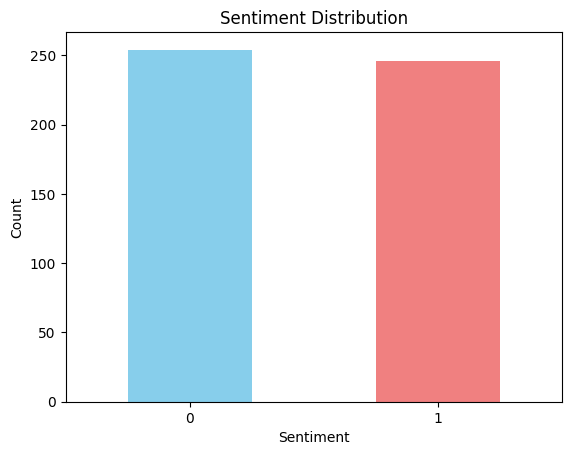

In [19]:
import matplotlib.pyplot as plt 

df['sentiment'].value_counts().plot(kind='bar', color = ['skyblue', 'lightcoral'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Analize the length of the reviews

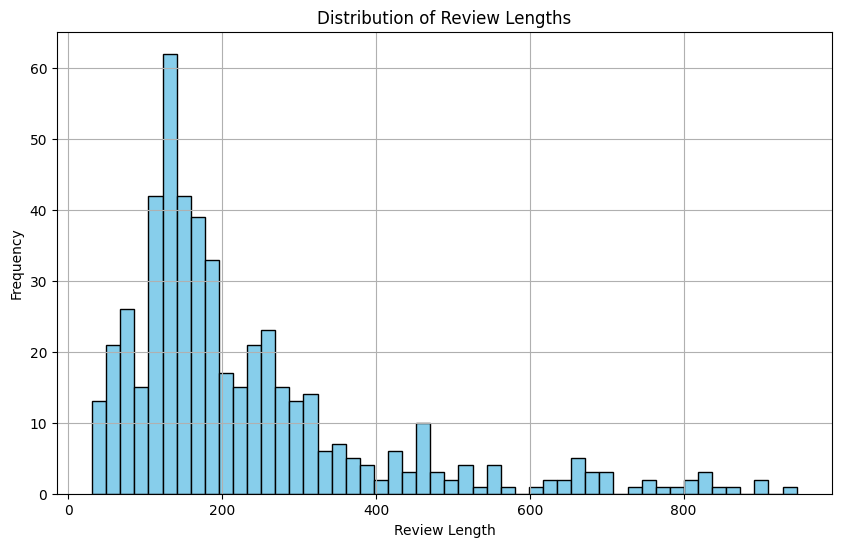

In [21]:
df['review_length'] = df['review'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
df['review_length'].hist(bins = 50, color = 'skyblue', edgecolor = 'black')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

The frequency of most common words for the positives and negatives reviews

In [22]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/dianaterraza/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dianaterraza/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import re # regular expressions 
from collections import Counter
from nltk.corpus import stopwords # they give any meaning to the text
from nltk.tokenize import word_tokenize # to split the text into words (tokens)

Token is the part of the text typically are words but not necessary are words

In [24]:
stop_words = set(stopwords.words('english'))
custom_stop_words = {'br', 'like', 'movie', 'film', 'one','story','time','see','would','films','good','time'}

The function that clean the text :

In [26]:
def clean_text(text):
    text = text.lower() # lowercase
    text = re.sub(r'\d+', '', text) # remove numbers
    text = re.sub(r'[^\w\s]', '', text) # remove punctuation
    return text

df['clean_review'] = df['review'].apply(clean_text)

option+ shift +7 = \

In [27]:
positive_review = df[df['sentiment'] == 1]['clean_review']
negative_review = df[df['sentiment'] == 0]['clean_review']


In [28]:
positive_review

0      there is no relation at all between fortier an...
1      this movie is a great the plot is very true to...
3      in the process of trying to establish the audi...
5      while this movies style isnt as understated an...
6      i give this movie  out of  because the villain...
                             ...                        
476    on the night of his bachelor party paul colema...
482    its time to pay tribute to the great charton h...
484    this movie has taken a lot of stick it was sla...
491    watching john cassavetes film opening night i ...
492    the power of kangwon province is director hong...
Name: clean_review, Length: 246, dtype: object

In [31]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/dianaterraza/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [32]:
def tokenize_and_remove_stopwords(reviews):
    tokens = []
    for review in reviews:
        words = word_tokenize(review)
        words = [word for word in words if word not in stop_words and word not in custom_stop_words and len(word)>1]
        tokens.extend(words)
    return tokens

List of tokens: one for the positives and other for negatives

In [33]:
positive_tokens = tokenize_and_remove_stopwords(positive_review)
negative_tokens = tokenize_and_remove_stopwords(negative_review)

In [34]:
positive_word_counts = Counter(positive_tokens)
negative_word_counts = Counter(negative_tokens)

Counter give us a dictionary where key is the word of the list and value is the ocurrency 

In [35]:
Counter([1,1,2,2,2])

Counter({2: 3, 1: 2})

We cut the list just in 15 words, positive and negative 

In [36]:
positive_top_words = positive_word_counts.most_common(15)
negative_top_words = negative_word_counts.most_common(15)

In [37]:
positive_word_counts

Counter({'also': 131,
         'great': 113,
         'even': 110,
         'much': 103,
         'really': 99,
         'well': 97,
         'show': 97,
         'many': 93,
         'first': 92,
         'get': 90,
         'love': 86,
         'two': 81,
         'people': 79,
         'little': 79,
         'best': 77,
         'way': 74,
         'think': 73,
         'life': 72,
         'movies': 69,
         'man': 69,
         'made': 69,
         'still': 67,
         'characters': 66,
         'character': 64,
         'never': 62,
         'could': 60,
         'though': 57,
         'go': 56,
         'dont': 56,
         'seen': 55,
         'make': 55,
         'watch': 54,
         'makes': 54,
         'funny': 52,
         'doesnt': 52,
         'world': 52,
         'scenes': 52,
         'know': 52,
         'years': 51,
         'may': 51,
         'another': 51,
         'real': 51,
         'series': 50,
         'plot': 50,
         'say': 50,
         'better':

Convert into DataFrame:

In [38]:
positive_df = pd.DataFrame(positive_top_words, columns = ['Word', 'Count'])
positive_df

,Word,Count
0,also,131
1,great,113
2,even,110
3,much,103
4,really,99
5,well,97
6,show,97
7,many,93
8,first,92
9,get,90


In [39]:
negative_df = pd.DataFrame(negative_top_words, columns = ['Word', 'Count'])
negative_df

,Word,Count
0,even,159
1,bad,144
2,really,140
3,dont,124
4,plot,103
5,get,101
6,people,99
7,make,99
8,much,95
9,characters,87


Plot the frequency:

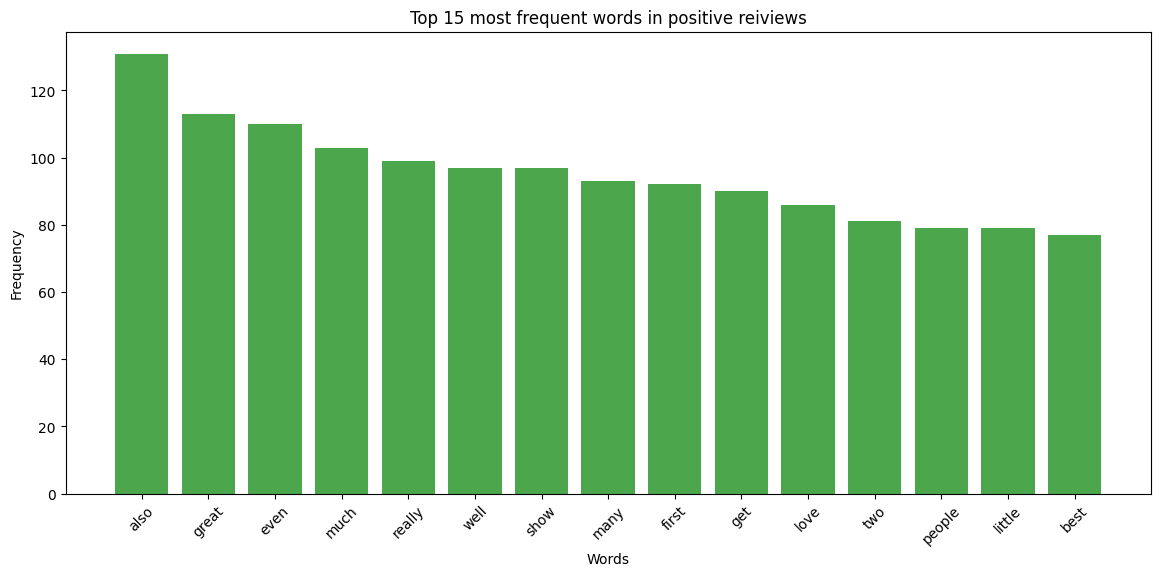

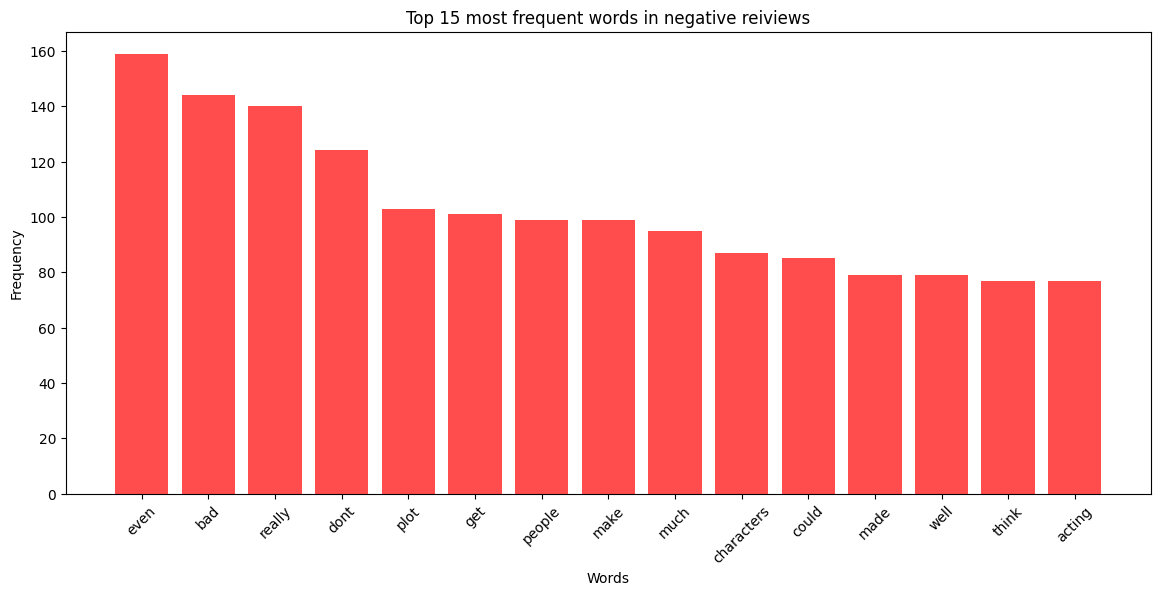

In [40]:
plt.figure(figsize = (14,6))
plt.bar(positive_df['Word'], positive_df['Count'], color = 'green', alpha = 0.7)
plt.title('Top 15 most frequent words in positive reiviews')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation = 45)
plt.show()


plt.figure(figsize = (14,6))
plt.bar(negative_df['Word'], negative_df['Count'], color = 'red', alpha = 0.7)
plt.title('Top 15 most frequent words in negative reiviews')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation = 45)
plt.show()

Bigrams 
"I love long walks"
i, love, long, walks

i, love
love, long
long, walk

Bring more context to our analysis 

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1,2), stop_words='english')

In [48]:
df.head()

,review,sentiment,review_length,clean_review
0,There is no relation at all between Fortier an...,1,125,there is no relation at all between fortier an...
1,This movie is a great. The plot is very true t...,1,131,this movie is a great the plot is very true to...
2,"George P. Cosmatos' ""Rambo: First Blood Part I...",0,177,george p cosmatos rambo first blood part ii is...
3,In the process of trying to establish the audi...,1,119,in the process of trying to establish the audi...
4,"Yeh, I know -- you're quivering with excitemen...",0,636,yeh i know youre quivering with excitement we...


In [49]:
X_ngram = vectorizer.fit_transform(df['review'])

In [ ]:
#X_ngram = vectorizer.fit_transform(df['clean_review'])

In [50]:
ngram_df = pd.DataFrame(X_ngram.toarray(),
                        columns = vectorizer.get_feature_names_out())
ngram_df.head()

,000,000 grand,02,02 10,05,05 love,10,10 10,10 12,10 15,10 br,10 depending,10 dr,10 far,10 film,10 fun,10 gave,10 good,10 highly,10 hits,10 isn,10 items,10 just,10 lines,10 look,10 looking,10 major,10 minus,10 minutes,10 nice,10 non,10 overly,10 page,10 reviews,10 seconds,10 smiles,10 stars,10 times,10 villains,10 way,...,ziyi,ziyi zhang,zombie,zombie chicks,zombie father,zombie genre,zombie honeymoon,zombie list,zombie machete,zombie make,zombie movie,zombie named,zombie related,zombie servant,zombies,zombies 1950s,zombies arm,zombies house,zombies small,zombies tamed,zombiez,zombiez watch,zomcoms,zomcoms shawn,zone,zone instead,zone recognize,zone terms,zone wasn,zooming,zooming object,zooms,zooms island,zoos,zoos bad,zsa,zsa gabor,zsa zsa,zu,zu warriors
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [51]:
ngram_sum = ngram_df.sum(axis=0).sort_values(ascending=False)
ngram_sum

br               1980
br br             992
movie             899
film              813
like              406
                 ... 
funny years         1
fur clothing        1
fur coats           1
fur intensely       1
zu warriors         1
Length: 60041, dtype: int64

How many empty reviews i have after the cleaning 

In [52]:
df.head()

,review,sentiment,review_length,clean_review
0,There is no relation at all between Fortier an...,1,125,there is no relation at all between fortier an...
1,This movie is a great. The plot is very true t...,1,131,this movie is a great the plot is very true to...
2,"George P. Cosmatos' ""Rambo: First Blood Part I...",0,177,george p cosmatos rambo first blood part ii is...
3,In the process of trying to establish the audi...,1,119,in the process of trying to establish the audi...
4,"Yeh, I know -- you're quivering with excitemen...",0,636,yeh i know youre quivering with excitement we...


In [53]:
empty_reviews = df['clean_review'].str.strip() == ''
empty_reviews.sum()

np.int64(0)

Add more stopwords

In [54]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

stop_words_list = list(ENGLISH_STOP_WORDS)

In [55]:
vectorizer = CountVectorizer(stop_words=stop_words_list)

In [56]:
X_cleaned = vectorizer.fit_transform(df['clean_review'])

In [57]:
X_cleaned_df = pd.DataFrame(X_cleaned.toarray(),
                            columns = vectorizer.get_feature_names_out())   

500 are the number of rows (of reviews)

13158 Tokens 

In [58]:
X_cleaned_df.shape

(500, 13158)

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer

TfidfVectorizer = TfidfVectorizer(stop_words=stop_words_list)

X_tfidf = TfidfVectorizer.fit_transform(df['clean_review'])
X_tfidf = pd.DataFrame(X_tfidf.toarray(), 
                       columns = TfidfVectorizer.get_feature_names_out())
X_tfidf.shape

(500, 13158)

Train test split:

* 400 rows for the train 
* 100 rows for the test 

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, 
                                                    df['sentiment'], 
                                                    test_size=0.2, 
                                                    random_state=42)

print(X_train.shape)
print(X_test.shape)

(400, 13158)
(100, 13158)


Note : Use .fit_transform() only on the training data. For the test data or validation folds, always use .transform() to avoid data leakage.